# 1. Looking at the big picture

Welcome to **Machine Learning Housing Corporation!**

The first task you are asked to
perform is to build a model of housing prices in California using the California cen‐
sus data. This data has metrics such as the population, median income, median hous‐
ing price, and so on for each block group in California. Block groups are the smallest
geographical unit for which the US Census Bureau publishes sample data (a block
group typically has a population of 600 to 3,000 people). We will just call them “dis‐
tricts” for short.

> <mark>Your model should learn from this data and be able to predict the median housing
price in any district, given all the other metrics</mark>

## Framing the problem

### How does the company expects to use and benefit from this model?

Your boss answers that your model’s output (a prediction of a district’s median hous‐
ing price) will be fed to another Machine Learning system, along
with many other signals.

<center>
  <img src="https://img-blog.csdnimg.cn/20191204154840618.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70" />
</center>

This downstream system will determine whether it is worth
investing in a given area or not. <mark>Getting this right is critical, as it directly affects revenue.</mark>


### What the current solution looks like (if any)?

Your boss answers that **the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.**

This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. 

This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district. The census data looks like a great dataset to exploit for this purpose, since it includes the median housing prices of thousands of districts, as well as other data.

> Okay, with all this information you are now ready to start designing your system.



### What kind of problem are we solving?

- Is it supervised, unsupervised, or Reinforcement Learning?
- Is it a classification task, a regression task, or something else?
- Should you use batch learning or online learning techniques?


It is clearly a typical supervised learning task since you are given labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price).

Moreover, it is also a typical regression task, since you are asked to predict a value. 

More specifically, **this is a multiple regression problem since the system will use multiple features to make a prediction** (it will use the district’s population, the median income, etc.). ***It is also a univariate regression problem since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a multivariate regression problem.***

Finally, **there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.**



## Select a Performance Measure

### RMSE

A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.

$$\sqrt{\frac{1}{m} \sum\limits_{i=i}^m [h(x_i)-y_i]^2}$$

<center> Or also </center>

$$\sqrt{\frac{1}{m} \sum\limits_{i=i}^m (ŷ_i-y_i)^2}$$

- m is the number of instances in the dataset
- $x_i$ is a vector of all the feature values (excluding the label) of the ith instance in the dataset, and $y_i$ is its label (the desired output value for that instance).
- $X$ is a matrix containing all the feature values (excluding labels) of all instances in
the dataset.
- $h$ is your system’s prediction function, also called a hypothesis. When your system is given an instance’s feature vector $x_i$, it outputs a predicted value $ŷ_i$ = $h(x_i)$
for that instance (ŷ is pronounced “y-hat”).

Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. For example, suppose that there are many outlier districts. In that case you may consider using

### Mean Absolute Error (also called the Average Absolute Deviation)

Mean absolute error (MAE) is one of the most common metrics that is used to calculate the prediction error of the model. Prediction error of a single row of data is:

$$
\text{Prediction Error} = \text{Actual Value} - \text{Predicted Value}
$$

We need to calculate prediction errors for each row of data, get their absolute value and then find the mean of all absolute prediction errors.

MAE is given by the following formula:

$$
\text {MAE (Mean Absolute Error)} = \frac{1}{N} \sum_{i=1} ^ N |y_i - \hat{y}|
$$



## Check the assumptions

Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on.

For example, the district prices that your system outputs are going to be fed into a downstream Machine Learning system, and we assume that these prices are going to be used as such. 

But what if the downstream system actually converts the prices into categories (e.g., “cheap,” “medium,” or “expensive”) and then uses those categories instead of the prices themselves? 

In this case, getting the price perfectly right is not important at all; your system just needs to get the category right. If that’s so, then the problem should have been framed as a classification task, not a regression task. You don’t want to find this out after working on a regression system for months. 

> Fortunately, after talking with the team in charge of the downstream system, you are confident that they do indeed need the actual prices, not just categories. Great!

# 2. Getting the data

## Importing Libraries

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing

## Importing dataset

In this chapter we chose the California Housing Prices dataset from the StatLib repos‐
itory. This dataset was based on data from the 1990 California cen‐
sus. It is not exactly recent (you could still afford a nice house in the Bay Area at the
time), but it has many qualities for learning, so we will pretend it is recent data.

In [196]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [197]:
 california_housing_raw_df = load_housing_data()

 california_housing_raw_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Taking a quick look at the data structure

In [198]:
california_housing_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [199]:
california_housing_raw_df.shape

(20640, 10)

In [200]:
california_housing_raw_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute.

In [201]:
california_housing_raw_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Profilling data

In [202]:
try:
  from dataprep.eda import create_report
except:
  !pip install dataprep
  from dataprep.eda import create_report

DataPrep Report
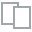
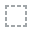
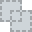
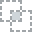
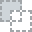
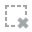
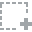
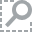
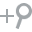
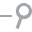
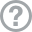
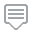
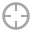
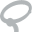
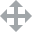
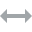
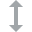
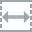
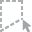
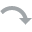
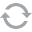
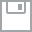
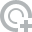
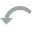
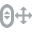
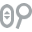
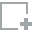
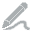
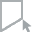
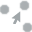
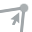
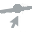

In [203]:
create_report(california_housing_raw_df)

1. First, **the median income attribute does not look like it is expressed in US dollars (USD).** After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about \$30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the
data was computed.
2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond \$500,000, then you have mainly two options:
  a. Collect proper labels for the districts whose labels were capped.
  b. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond \$500,000).
3. These attributes have very different scales. We will discuss this later in this chapter when we explore feature scaling.
4. Finally, many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

## Create a test set

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? 

This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model.

> <mark>When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.</mark>

Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside.

`Scikit-Learn` provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split
1. There is a `random_state` parameter that allows you to set the random generator seed as explained previously. 
2. You can pass it multiple datasets, with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels)

In [204]:
from sklearn.model_selection import train_test_split

california_housing_raw_train_set, california_housing_raw_test_set = train_test_split(california_housing_raw_df , test_size=0.2, random_state=42)

So far we have considered purely random sampling methods. **This is generally fine if your dataset is large enough especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias.**

> _When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population._

> For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called <mark>stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population</mark>. If they used purely random sampling, there would be about 12% chance of sampling a skewed test set with either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.

### Checking sample bias.

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create
an income category attribute.

In [205]:
california_housing_raw_df["income_cat"] = pd.cut(california_housing_raw_df["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

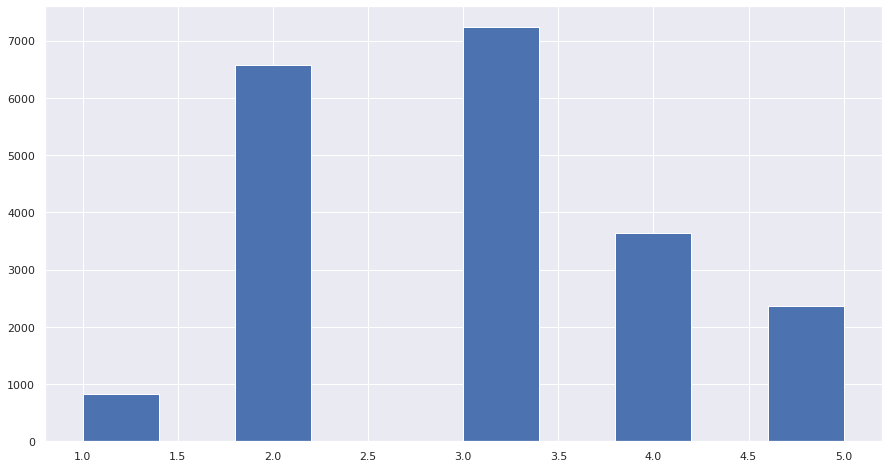

In [206]:
california_housing_raw_df["income_cat"].hist()

plt.show()

Now you are ready to do stratified sampling based on the income category.
> For this you can use Scikit-Learn’s `StratifiedShuffleSplit` class.

In [207]:
from sklearn.model_selection import StratifiedShuffleSplit

In [208]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(california_housing_raw_df, california_housing_raw_df["income_cat"]):
    housing_raw_train_set = california_housing_raw_df.loc[train_index]
    housing_raw_test_set = california_housing_raw_df.loc[test_index]

In [209]:
housing_raw_test_set["income_cat"].value_counts() / len(housing_raw_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [210]:
for set_ in (housing_raw_train_set, housing_raw_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

> <mark> We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of a Machine Learning project. </mark>

# 3. Discover and Visualize the Data to Gain Insight

## Visualizing data

### Most expensive houses

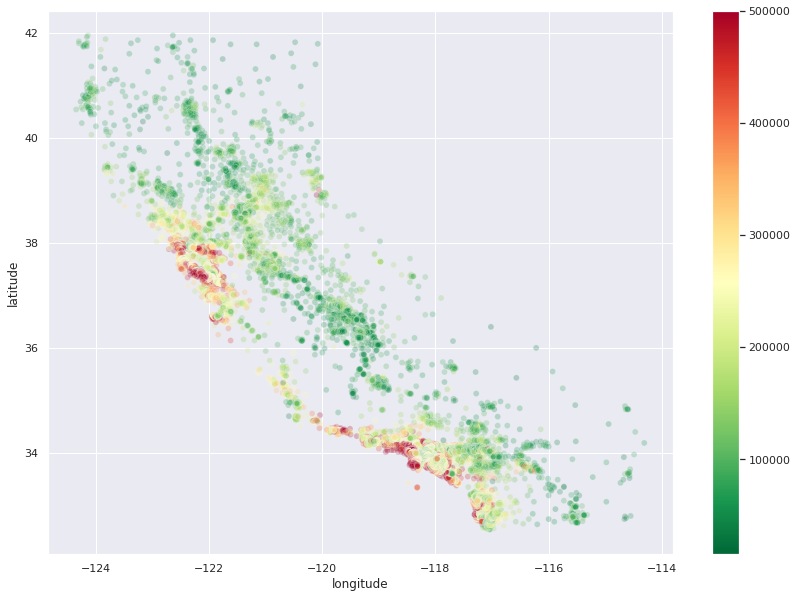

In [211]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)

sns.scatterplot(
    x="longitude",
    y="latitude",
    alpha=0.25,
    hue="median_house_value",
    data=california_housing_raw_df,
    palette="RdYlGn_r",
    ax = ax
)

norm = plt.Normalize(california_housing_raw_df['median_house_value'].min(), california_housing_raw_df['median_house_value'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.show()

Now that’s much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

More generally, our brains are very good at spotting patterns on pictures, but you may need to play around with visualization parameters to make the patterns stand out.

> <mark>This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.</mark>

### Most populated neighboorhoods

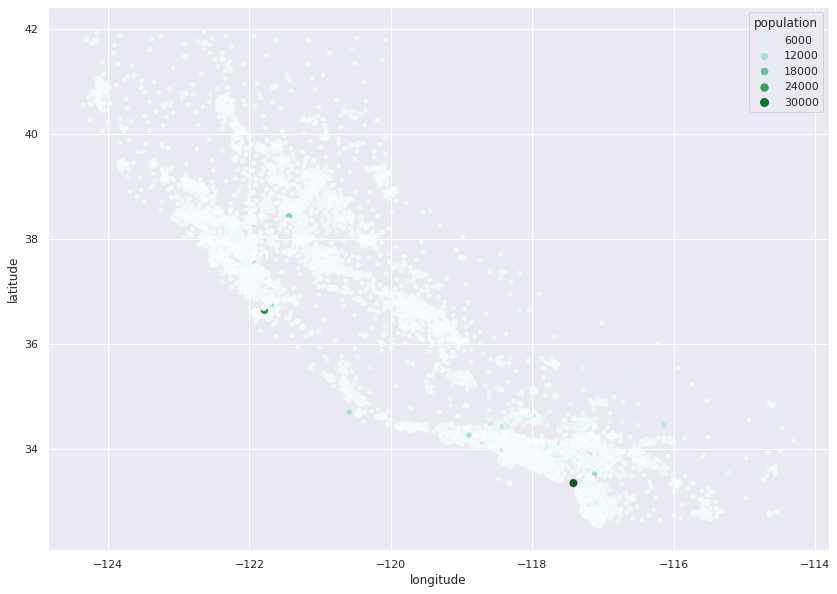

In [212]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)

sns.scatterplot(
    x="longitude",
    y="latitude",
    alpha=.9,
    hue="population",
    size="population",
    data=california_housing_raw_df,
    palette="BuGn",
    ax = ax
)


plt.show()

## Looking for correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the `corr()` method.

### Correlation matrix

In [213]:
corr_matrix = california_housing_raw_df.corr()

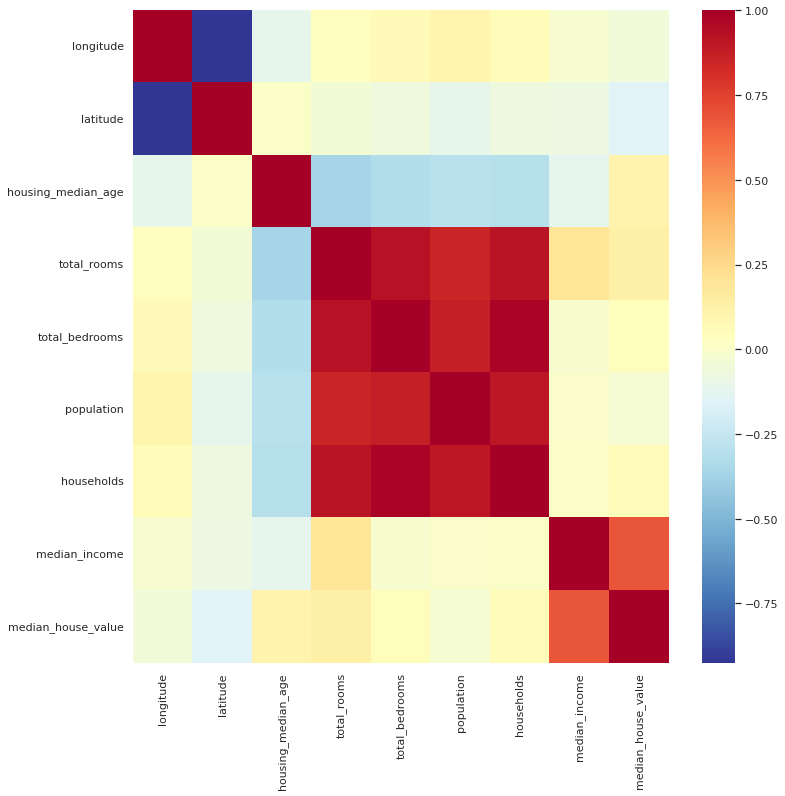

In [214]:
g = sns.heatmap(
    corr_matrix, 
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.columns,
    cmap="RdYlBu_r"
)

g.figure.set_size_inches(12,12)
plt.show()

The correlation coefficient ranges from –1 to 1.
- When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.
- When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north).
- Finally, coefficients close to zero mean that there is no linear correlation.

> The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”). Note how all the plots of the bottom row have a correlation coefficient equal to zero despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships. Also, the second row shows examples where the correlation coefficient is equal to 1 or –1; notice that this has nothing to do with the slope. For example, your height in inches has a correlation coefficient of 1 with your height in feet or in nanometers.

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute.

### Scatter matrix

Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function, which plots every numerical attribute against every other numerical attribute.

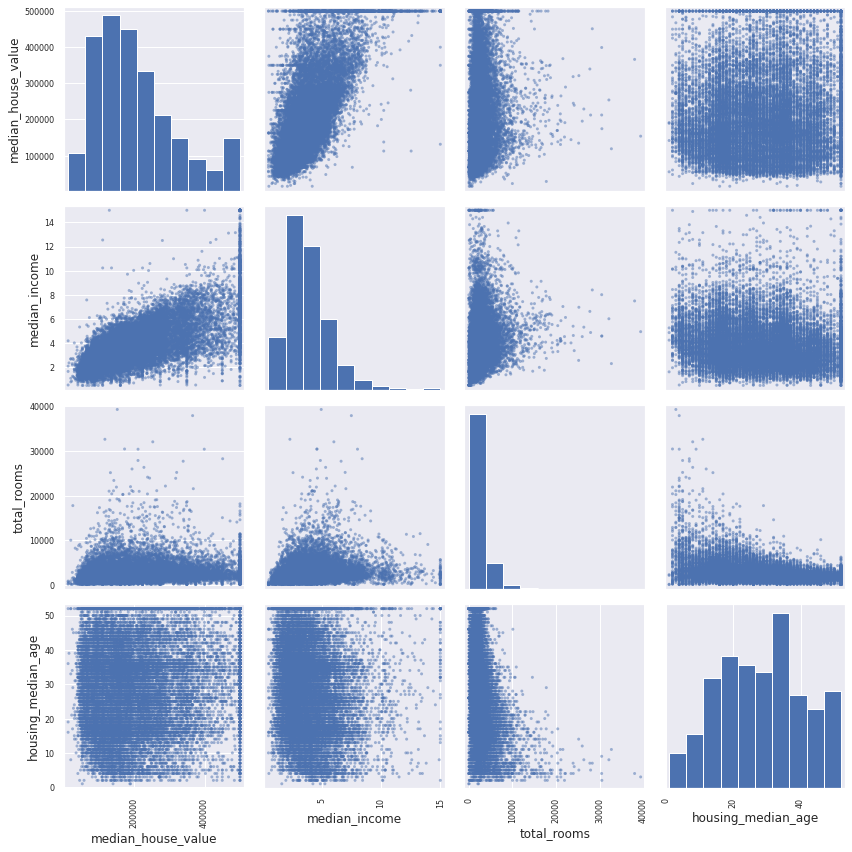

In [215]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(california_housing_raw_df[attributes], figsize=(12, 12))
plt.tight_layout()
plt.show()

The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot

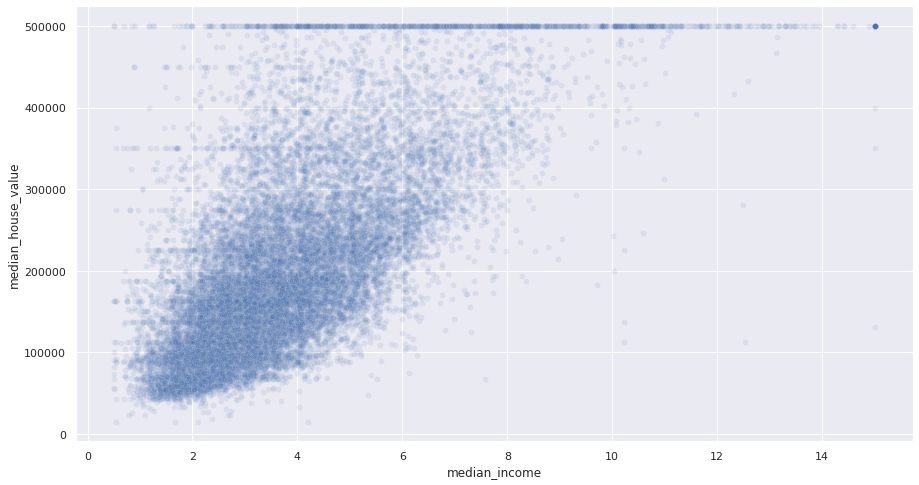

In [216]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(x="median_income", y="median_house_value", alpha=.1, data = california_housing_raw_df)

plt.show()

This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at \$500,000. 

> But this plot reveals other less obvious straight lines: a horizontal line around \$450,000, another around \$350,000, perhaps one around \$280,000, and a few more below that. 

<mark>You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.</mark>

### Experimenting with Attribute Combinations

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations.

- For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household.
- Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. 

Let’s create these newattributes:

In [217]:
california_housing_raw_df["rooms_per_household"] = california_housing_raw_df["total_rooms"]/california_housing_raw_df["households"]
california_housing_raw_df["bedrooms_per_room"] = california_housing_raw_df["total_bedrooms"]/california_housing_raw_df["total_rooms"]
california_housing_raw_df["population_per_household"]=california_housing_raw_df["population"]/california_housing_raw_df["households"]

In [218]:
corr_matrix = california_housing_raw_df.corr()

In [219]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

The new `bedrooms_per_room` attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.

The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

> This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.

# 4. Prepare the Data for Machine Learning Algorithms

Instead of just doing this manually, you should write functions to do that, for several good reasons:

- This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
- <mark>You will gradually build a library of transformation functions that you can reuse in future projects.</mark>
- You can use these functions in your live system to transform the new data before feeding it to your algorithms.
- This will make it possible for you to easily try various transformations and see which combination of transformations works best.

Let's create a clean training set and let's separate predictors and labels since they won't need the same transformation.

In [220]:
housing_raw_train_features = housing_raw_train_set.drop("median_house_value", axis = 1).copy()
housing_raw_train_labels = housing_raw_train_set["median_house_value"].copy()

## Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You noticed earlier that the `total_bedrooms` attribute has some missing values, so let’s fix this. You have three options:

- Get rid of the corresponding districts.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).

> You can accomplish these easily using DataFrame’s `dropna()`, `drop()`, and `fillna()` methods

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. Here is how to use it. First, you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

### Train set

#### Filling missing values for numerical features

In [221]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity.
Now you can fit the imputer instance to the training data using the fit() method.

In [222]:
housing_raw_train_features_num = housing_raw_train_features.drop("ocean_proximity", axis=1)

In [223]:
X_train_interim_df = pd.DataFrame(
    median_imputer.fit_transform(housing_raw_train_features_num),
    columns = housing_raw_train_features_num.columns
)

#### Dealing with categorical features

In [224]:
housing_raw_train_features_cat = housing_raw_train_features[['ocean_proximity']].copy()

##### Encoding them through OrdinalEncoding
Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these categories from text to numbers.

![](https://www.renom.jp/notebooks/tutorial/preprocessing/category_encoding/renom_cat_ordinal.png)

In [225]:
from sklearn.preprocessing import OrdinalEncoder

housing_raw_train_features_ordinal_encoder = OrdinalEncoder()

In [226]:
housing_raw_train_features_cat_ordinally_encoded = housing_raw_train_features_ordinal_encoder.fit_transform(housing_raw_train_features_cat)

You can get the list of categories using the categories_ instance variable. It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute)

In [227]:
ordinal_categories = housing_raw_train_features_ordinal_encoder.categories_[0] 

for category, index in zip(ordinal_categories, range(len(ordinal_categories))):
  print(f"Category {category} has index {index}")

Category <1H OCEAN has index 0
Category INLAND has index 1
Category ISLAND has index 2
Category NEAR BAY has index 3
Category NEAR OCEAN has index 4


##### Using OneHotEncoding

> <mark>One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).</mark>
![](https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png)

To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes.

In [228]:
from sklearn.preprocessing import OneHotEncoder

housing_raw_train_features_one_hot_encoder = OneHotEncoder()

In [229]:
housing_raw_train_features_cat_one_hot_encoded = housing_raw_train_features_one_hot_encoder.fit_transform(housing_raw_train_features_cat)

In [230]:
housing_raw_train_features_cat_one_hot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row.

<center>
  <img src = "https://matteding.github.io/images/sparse_dense.gif" width=500 />
</center>

Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the non-zero elements. You can use it mostly like a normal 2D array,21 but if you really want to convert it to a (dense) NumPy array, just call the toarray() method

In [231]:
housing_raw_train_features_cat_one_hot_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [232]:
from sys import getsizeof

print(f"The sparse matrix occupies {getsizeof(housing_raw_train_features_cat_one_hot_encoded) / 1000} KB while the dense one occupies {getsizeof(housing_raw_train_features_cat_one_hot_encoded.toarray()) / 1000} KB")

The sparse matrix occupies 0.064 KB while the dense one occupies 660.6 KB


> <mark>If a categorical attribute has a large number of possible categories (e.g., country code, profession, species, etc.), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). </mark>

Alternatively, you could replace each category with a learnable low dimensional vector called an embedding. Each category’s representation would be learned during training: this is an example of representation learning

#### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods:
- `fit()` -> returning self
- `transform()`
- `fit_transform()`.

> You can get the last one for free by simply adding TransformerMixin as a base class. 

Also, if you add BaseEstimator as a base class (and avoid *args and **kargs in your constructor) you will get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [233]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self # nothing else to do

  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

In this example the transformer has one hyperparameter, `add_bedrooms_per_room`,
set to `True` by default (**it is often helpful to provide sensible defaults**. 

<mark>This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about.</mark>

> *The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).*

In [234]:
housing_attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_raw_train_extra_features = housing_attr_adder.transform(housing_raw_train_features.values)

#### Feature Scaling


<mark>One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.</mark>

This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

> <mark>As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).</mark>


##### Min-Max Scaling

<center>
  <img src="https://i.pinimg.com/originals/43/6b/60/436b607fb77016f5b626475513fad75d.jpg" width=600 />
</center>

Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

##### Standarization

<center>
  <img src="https://i.morioh.com/210609/ad66d2ee.webp" width=600 />
</center>

Standardization is quite different.
1. It subtracts the mean value (so standardized values always have a zero mean).
2. Then it divides by the standard deviation so that the resulting distribution has unit variance (Unit variance means that the standard deviation of a sample as well as the variance will tend towards 1 as the sample size tends towards infinity).

> <mark>Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1).</mark>

However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.



#### Transformation PipeLines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations.



In [403]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


numerical_features_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
  ])
housing_transformed_train_features_num = numerical_features_pipeline.fit_transform(housing_raw_train_features_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps.

- **All but the last estimator must be transformers** (i.e., they must have a fit_transform() method). 
- **The names can be anything you like** (as long as they are unique and don’t contain double underscores “__”) -> they will come in handy later for hyperparameter tuning.

> When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the fit() method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a StandardScaler, which is a transformer, so the pipeline has a transform() method that applies all the transforms to the data in sequence (and of course also a fit_transform() method, which is the one we used)-


> So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20, Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news is that it works great with Pandas DataFrames.

In [404]:
numerical_attribs = list(housing_raw_train_features_num)
categorical_attribs = ["ocean_proximity"]

In [405]:
numerical_attribs,categorical_attribs

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 ['ocean_proximity'])

In [406]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([           
  ("numerical_features", numerical_features_pipeline, numerical_attribs),
  ("categorical_features", OneHotEncoder(), categorical_attribs),
])

housing_prepared_train_set = full_pipeline.fit_transform(housing_raw_train_features)

In [407]:
housing_prepared_train_set

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

> Note that the `OneHotEncoder` returns a sparse matrix, while the `numerical_features_pipeline` returns a dense matrix. When there is such a mix of sparse and dense matrices, the `ColumnTransformer` estimates the density of the final matrix (i.e., the ratio of non-zero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, `sparse_threshold`=0.3). In this example, it returns a dense matrix. 

And that’s it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column.

# 5. Select and train a Model

You framed the problem, you got the data and explored it, you sampled a
training set and a test set, and you wrote transformation pipelines to clean up and prepare your data for Machine Learning algorithms automatically. You are now ready to select and train a Machine Learning model.

## Linear Regressor


### Training and Evaluating on the Training Set

In [247]:
from sklearn.linear_model import LinearRegression

X_train, y_train = housing_prepared_train_set, housing_raw_train_labels

In [295]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

#### Making predictions

In [300]:
linear_regression_predictions = linear_regression_model.predict(X_train)

linear_regression_predictions_info =  pd.DataFrame({
    "Prediction": linear_regression_predictions,
    "Actual value": y_train,
    "Diff": linear_regression_predictions - y_train,
    "% Diff": ((linear_regression_predictions - y_train)/((linear_regression_predictions + y_train) / 2)) * 100,
}).reset_index(drop=True)

In [302]:
linear_regression_predictions_info.describe()

,Prediction,Actual value,Diff,% Diff
count,16512.000000,16512.000000,1.651200e+04,16512.000000
mean,207005.322372,207005.322372,3.807187e-13,3.415722
std,93148.912275,115701.297250,6.862995e+04,59.914144
min,-681332.279896,14999.000000,-8.157323e+05,-4317.370099
25%,143172.675494,119800.000000,-2.824049e+04,-14.725736
50%,203513.698300,179500.000000,1.068869e+04,5.994884
75%,261223.390538,263900.000000,4.232542e+04,25.047805
max,818437.819268,500001.000000,6.184378e+05,2926.317323


#### Measuring error

Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function.

In [303]:
from sklearn.metrics import mean_squared_error

linear_regression_model_mse = mean_squared_error(y_train, linear_regression_predictions)
linear_regression_model_mse = np.sqrt(linear_regression_model_mse)

In [317]:
f"On average, our Linear Regression model makes a prediction mistake of USD ${round(linear_regression_model_mse)} during training phase"

'On average, our Linear Regression model makes a prediction mistake of USD $68628 during training phase'

Okay, this is better than nothing but clearly not a great score: most districts’ median_housing_values range between \$120,000 and \$265,000, so a typical prediction error of \$68,628 is not very satisfying. This is an example of a model underfitting the training data. 

When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 
The main ways to fix underfitting are:

- Select a more powerful model.
- Feed the training algorithm with better features.
- Reduce the constraints on the model. 

> This model is not regularized, so this rules out the last option.

You could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

#### Better Evaluation on training data using Cross-Validation

![](https://cdn-images-1.medium.com/max/1009/1*1RPHQk-xpKMInxkEd1qFyg.png)

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. 

The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [330]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_regression_model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
linear_regression_scores = np.sqrt(-scores)

> Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [331]:
display_scores(linear_regression_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180644


## DecisionTreeRegressor

### Training and Evaluating on the Training Set

In [318]:
from sklearn.tree import DecisionTreeRegressor

In [319]:
decision_tree_regression_model = DecisionTreeRegressor()
decision_tree_regression_model.fit(X_train, y_train)

DecisionTreeRegressor()

#### Making predictions

In [320]:
decision_tree_regression_predictions = decision_tree_regression_model.predict(X_train)

decision_tree_regression_predictions_info =  pd.DataFrame({
    "Prediction": decision_tree_regression_predictions,
    "Actual value": y_train,
    "Diff": decision_tree_regression_predictions - y_train,
    "% Diff": ((decision_tree_regression_predictions - y_train)/((decision_tree_regression_predictions + y_train) / 2)) * 100,
}).reset_index(drop=True)

In [321]:
decision_tree_regression_predictions_info.describe()

,Prediction,Actual value,Diff,% Diff
count,16512.000000,16512.000000,16512.0,16512.0
mean,207005.322372,207005.322372,0.0,0.0
std,115701.297250,115701.297250,0.0,0.0
min,14999.000000,14999.000000,0.0,0.0
25%,119800.000000,119800.000000,0.0,0.0
50%,179500.000000,179500.000000,0.0,0.0
75%,263900.000000,263900.000000,0.0,0.0
max,500001.000000,500001.000000,0.0,0.0


#### Measuring error

Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function.

In [322]:
from sklearn.metrics import mean_squared_error

decision_tree_regression_model_mse = mean_squared_error(y_train, decision_tree_regression_predictions)
decision_tree_regression_model_mse = np.sqrt(decision_tree_regression_model_mse)

In [323]:
f"On average, our Decision Tree Regression model makes a prediction mistake of USD ${round(decision_tree_regression_model_mse)} during training phase"

'On average, our Decision Tree Regression model makes a prediction mistake of USD $0 during training phase'

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can you be sure? As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation.

#### Evaluation on training data Using Cross-Validation

In [334]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree_regression_model, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [335]:
print(f"{'-'*10} LINEAR REGRESSION SCORES {'-'*10}")
display_scores(linear_regression_scores)

print(f"{'-'*10} REGRESSION DECISION TREE SCORES {'-'*10}")
display_scores(tree_rmse_scores)

---------- LINEAR REGRESSION SCORES ----------
Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180644
---------- REGRESSION DECISION TREE SCORES ----------
Scores: [72457.99713842 70127.32509067 68546.19299685 71013.98329838
 69537.31810593 77304.97448813 70185.99725089 73862.43643976
 68514.56729217 70934.3758686 ]
Mean: 71248.51679698018
Standard deviation: 2553.8410727530245


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! 

> Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). 

The Decision Tree has a score of approximately 71,407, generally ±2,439.

> You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.

<mark>The Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.</mark>

## RandomForestRegressor

<center>
  <img src="https://www.researchgate.net/publication/313489088/figure/fig3/AS:864415041732616@1583104014685/Fig-A10-Random-Forest-Regressor-The-regressor-used-here-is-formed-of-100-trees-and-the.jpg" width=600 />

</center>

Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions.

> Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further.

### Training and Evaluating on the Training Set

In [337]:
from sklearn.ensemble import RandomForestRegressor

In [338]:
random_forest_regression_model = RandomForestRegressor()
random_forest_regression_model.fit(X_train, y_train)

RandomForestRegressor()

#### Making predictions

In [340]:
random_forest_regression_predictions = random_forest_regression_model.predict(X_train)

random_forest_regression_predictions_info =  pd.DataFrame({
    "Prediction": random_forest_regression_predictions,
    "Actual value": y_train,
    "Diff": random_forest_regression_predictions - y_train,
    "% Diff": ((random_forest_regression_predictions - y_train)/((random_forest_regression_predictions + y_train) / 2)) * 100,
}).reset_index(drop=True)

In [341]:
random_forest_regression_predictions_info.describe()

,Prediction,Actual value,Diff,% Diff
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,207380.684500,207005.322372,375.362128,1.960702
std,108605.038795,115701.297250,18627.438719,9.398043
min,38298.340000,14999.000000,-155012.390000,-36.689774
25%,125099.750000,119800.000000,-5592.500000,-2.846156
50%,183711.500000,179500.000000,1759.500000,1.146306
75%,262955.265000,263900.000000,8547.015000,5.667085
max,500001.000000,500001.000000,112680.260000,117.658954


#### Measuring error

Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function.

In [342]:
from sklearn.metrics import mean_squared_error

random_forest_regression_model_mse = mean_squared_error(y_train, random_forest_regression_predictions)
random_forest_regression_model_mse = np.sqrt(random_forest_regression_model_mse)

In [343]:
f"On average, our Decision Tree Regression model makes a prediction mistake of USD ${round(random_forest_regression_model_mse)} during training phase"

'On average, our Decision Tree Regression model makes a prediction mistake of USD $18631 during training phase'

Wow, this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. 

> Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

However, before you dive much deeper in Random Forests, you should try out many other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

> You should save every model you experiment with, so you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make.

You can easily save
Scikit-Learn models by using Python’s pickle module, or using sklearn.externals.joblib, which is more efficient at serializing large NumPy arrays:

#### Evaluation on training data Using Cross-Validation

In [346]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest_regression_model, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
random_forest_regression_rmse_scores = np.sqrt(-scores)

In [347]:
print(f"{'-'*10} LINEAR REGRESSION SCORES {'-'*10}")
display_scores(linear_regression_scores)

print(f"{'-'*10} REGRESSION DECISION TREE SCORES {'-'*10}")
display_scores(tree_rmse_scores)

print(f"{'-'*10} REGRESSION DECISION TREE SCORES {'-'*10}")
display_scores(random_forest_regression_rmse_scores)


---------- LINEAR REGRESSION SCORES ----------
Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180644
---------- REGRESSION DECISION TREE SCORES ----------
Scores: [72457.99713842 70127.32509067 68546.19299685 71013.98329838
 69537.31810593 77304.97448813 70185.99725089 73862.43643976
 68514.56729217 70934.3758686 ]
Mean: 71248.51679698018
Standard deviation: 2553.8410727530245
---------- REGRESSION DECISION TREE SCORES ----------
Scores: [51380.11016339 49221.93497085 46951.66610883 51991.52143899
 47870.39925737 52017.10181739 52678.1306322  49746.0148008
 48426.84201894 53820.37871582]
Mean: 50410.40999245814
Standard deviation: 2167.836100412339


## Saving a model

In [ ]:
import joblib

joblib.dump(random_forest_regression_model, "random_forest_regression_raw_model.pkl")
# and later...
random_forest_regression_model_loaded = joblib.load("random_forest_regression_raw_model.pkl")

# 6. Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them.

## Grid Search

One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations. 

Instead you should get Scikit-Learn’s `GridSearchCV` to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

> If `GridSearchCV` is initialized with `refit=True` (which is the
default), then once it finds the best estimator using cross-
validation, it retrains it on the whole training set. This is usually a
good idea since feeding it more data will likely improve its perfor‐
mance.

For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [359]:
from sklearn.model_selection import GridSearchCV
random_forest_regressor_params_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2,4,6,8]},
    {'bootstrap': [False],'n_estimators': [3, 10], 'max_features': [2,3,4]},
]

random_forest_regression_model = RandomForestRegressor()

random_forest_regression_grid_search = GridSearchCV(
    random_forest_regression_model,
    random_forest_regressor_params_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    refit=True
)

This param_grid tells Scikit-Learn to:
1. Evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict.
2. Then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).

All in all, the grid search will explore 12 + 6 = 18 combinations of `RandomForestRegressor` hyperparameter values, and **it will train each model five times (since we are using five-fold cross validation)**. In other words, all in all, **<mark>there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this</mark>**

> When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).

In [360]:
random_forest_regression_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [361]:
random_forest_regression_grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

And of course the evaluation scores are also available:

In [362]:
random_forest_regression_grid_search_cross_validation_results = random_forest_regression_grid_search.cv_results_

for mean_score, params in zip(random_forest_regression_grid_search_cross_validation_results["mean_test_score"], random_forest_regression_grid_search_cross_validation_results["params"]):
  print(np.sqrt(-mean_score), params)

64461.48263620957 {'max_features': 2, 'n_estimators': 3}
55315.33230480223 {'max_features': 2, 'n_estimators': 10}
52581.97810543923 {'max_features': 2, 'n_estimators': 30}
52153.134357723924 {'max_features': 2, 'n_estimators': 50}
59907.485093929456 {'max_features': 4, 'n_estimators': 3}
52844.073877344636 {'max_features': 4, 'n_estimators': 10}
50473.89551695401 {'max_features': 4, 'n_estimators': 30}
50168.80672997451 {'max_features': 4, 'n_estimators': 50}
59138.718025837254 {'max_features': 6, 'n_estimators': 3}
52242.988628863524 {'max_features': 6, 'n_estimators': 10}
50239.508056502076 {'max_features': 6, 'n_estimators': 30}
49573.70708626148 {'max_features': 6, 'n_estimators': 50}
59119.65988202946 {'max_features': 8, 'n_estimators': 3}
52091.527759006756 {'max_features': 8, 'n_estimators': 10}
50120.396263327915 {'max_features': 8, 'n_estimators': 30}
49713.61670754276 {'max_features': 8, 'n_estimators': 50}
62484.058926982034 {'bootstrap': False, 'max_features': 2, 'n_estima

> Don’t forget that you can treat some of the data preparation steps as hyperparameters. For example, **the grid search will automatically find out whether or not to add a feature you were not sure about** (e.g., using the `add_bedrooms_per_room` hyperparameter of your `CombinedAttributesAdder` transformer). It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more.

In [383]:
grid_search_random_forest_regression_predictions = random_forest_regression_grid_search.best_estimator_.predict(X_train)

grid_search_random_forest_regression_predictions_info =  pd.DataFrame({
    "Prediction": grid_search_random_forest_regression_predictions,
    "Actual value": y_train,
    "Diff": grid_search_random_forest_regression_predictions - y_train,
    "% Diff": ((grid_search_random_forest_regression_predictions - y_train)/((grid_search_random_forest_regression_predictions + y_train) / 2)) * 100,
}).reset_index(drop=True)

In [384]:
grid_search_random_forest_regression_predictions_info

,Prediction,Actual value,Diff,% Diff
0,77816.00,72100.0,5716.00,7.625604
1,319554.02,279600.0,39954.02,13.336811
2,80460.00,82700.0,-2240.00,-2.745771
3,118512.00,112500.0,6012.00,5.204924
4,234290.00,238300.0,-4010.00,-1.697031
...,...,...,...,...
16507,275510.02,268500.0,7010.02,2.577166
16508,93826.00,90400.0,3426.00,3.719345
16509,152230.00,140400.0,11830.00,8.085295
16510,248836.00,258100.0,-9264.00,-3.654899


In [385]:
grid_search_random_forest_regression_predictions_info.describe()

,Prediction,Actual value,Diff,% Diff
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,207195.898603,207005.322372,190.576232,2.019817
std,107912.128569,115701.297250,18822.211873,9.512204
min,39126.000000,14999.000000,-155372.460000,-49.420789
25%,125711.000000,119800.000000,-5874.000000,-2.905446
50%,184058.000000,179500.000000,1731.030000,1.149405
75%,262784.500000,263900.000000,8949.000000,5.915429
max,500001.000000,500001.000000,149190.120000,124.189680


## Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

This approach has two main benefits:

- **If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter** (instead of just a few values per hyperparameter with the grid search approach).
- **You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations**.

In [387]:
from sklearn.model_selection import RandomizedSearchCV

random_forest_regression_model = RandomForestRegressor()

random_forest_regression_randomized_search_model = RandomizedSearchCV(
    random_forest_regression_model,
    random_forest_regressor_params_grid,
    n_iter = 10,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    refit=True
)

In [388]:
random_forest_regression_randomized_search_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30, 50]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [390]:
random_forest_regression_randomized_search_model.best_params_

{'max_features': 4, 'n_estimators': 50}

And of course the evaluation scores are also available:

In [391]:
random_forest_regression_randomized_search_cross_validation_results = random_forest_regression_randomized_search_model.cv_results_

for mean_score, params in zip(random_forest_regression_randomized_search_cross_validation_results["mean_test_score"], random_forest_regression_randomized_search_cross_validation_results["params"]):
  print(np.sqrt(-mean_score), params)

64035.760134503704 {'n_estimators': 3, 'max_features': 2}
60934.888414840134 {'n_estimators': 3, 'max_features': 4}
55251.571022748474 {'n_estimators': 10, 'max_features': 2}
49752.088794846015 {'n_estimators': 30, 'max_features': 6}
52324.96498550619 {'n_estimators': 50, 'max_features': 2}
52651.04879766144 {'n_estimators': 30, 'max_features': 2}
52250.86985228629 {'n_estimators': 10, 'max_features': 8}
49638.09070028657 {'n_estimators': 50, 'max_features': 4}
49851.103376608015 {'n_estimators': 50, 'max_features': 8}
53041.6806523469 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}


In [392]:
randomized_search_random_forest_regression_predictions = random_forest_regression_grid_search.best_estimator_.predict(X_train)

randomized_search_random_forest_regression_predictions_info =  pd.DataFrame({
    "Prediction": randomized_search_random_forest_regression_predictions,
    "Actual value": y_train,
    "Diff": randomized_search_random_forest_regression_predictions - y_train,
    "% Diff": ((randomized_search_random_forest_regression_predictions - y_train)/((randomized_search_random_forest_regression_predictions + y_train) / 2)) * 100,
}).reset_index(drop=True)

In [393]:
randomized_search_random_forest_regression_predictions_info

,Prediction,Actual value,Diff,% Diff
0,77816.00,72100.0,5716.00,7.625604
1,319554.02,279600.0,39954.02,13.336811
2,80460.00,82700.0,-2240.00,-2.745771
3,118512.00,112500.0,6012.00,5.204924
4,234290.00,238300.0,-4010.00,-1.697031
...,...,...,...,...
16507,275510.02,268500.0,7010.02,2.577166
16508,93826.00,90400.0,3426.00,3.719345
16509,152230.00,140400.0,11830.00,8.085295
16510,248836.00,258100.0,-9264.00,-3.654899


In [394]:
randomized_search_random_forest_regression_predictions_info.describe()

,Prediction,Actual value,Diff,% Diff
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,207195.898603,207005.322372,190.576232,2.019817
std,107912.128569,115701.297250,18822.211873,9.512204
min,39126.000000,14999.000000,-155372.460000,-49.420789
25%,125711.000000,119800.000000,-5874.000000,-2.905446
50%,184058.000000,179500.000000,1731.030000,1.149405
75%,262784.500000,263900.000000,8949.000000,5.915429
max,500001.000000,500001.000000,149190.120000,124.189680


## Analyzing the best models and their errors

You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

### GridSearch Results

In [396]:
feature_importances = random_forest_regression_grid_search.best_estimator_.feature_importances_
feature_importances

array([7.75970509e-02, 6.92183552e-02, 4.38970152e-02, 1.77023525e-02,
       1.69069412e-02, 1.70645625e-02, 1.64696969e-02, 3.00881398e-01,
       6.69346934e-02, 1.08026790e-01, 9.20001052e-02, 9.97594191e-03,
       1.56735347e-01, 9.82633765e-05, 2.44773628e-03, 4.04375085e-03])

In [399]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["categorical_features"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numerical_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3008813980205903, 'median_income'),
 (0.15673534678706877, 'INLAND'),
 (0.10802678972819012, 'pop_per_hhold'),
 (0.09200010520893018, 'bedrooms_per_room'),
 (0.07759705094220974, 'longitude'),
 (0.06921835519213287, 'latitude'),
 (0.06693469341353439, 'rooms_per_hhold'),
 (0.04389701521058611, 'housing_median_age'),
 (0.01770235252013916, 'total_rooms'),
 (0.01706456245616135, 'population'),
 (0.016906941243728206, 'total_bedrooms'),
 (0.016469696852380512, 'households'),
 (0.009975941913860229, '<1H OCEAN'),
 (0.0040437508548216115, 'NEAR OCEAN'),
 (0.002447736279164554, 'NEAR BAY'),
 (9.82633765019599e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others).

> <mark>You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).</mark>

### RandomSearch Results

In [400]:
feature_importances = random_forest_regression_randomized_search_model.best_estimator_.feature_importances_
feature_importances

array([8.66836121e-02, 7.28182683e-02, 4.19121990e-02, 2.46937330e-02,
       2.05281749e-02, 2.42314163e-02, 2.09515629e-02, 2.95070026e-01,
       7.07778030e-02, 9.90754373e-02, 8.35666277e-02, 2.21973099e-02,
       1.20584804e-01, 8.89278807e-05, 6.31463261e-03, 1.05054649e-02])

In [401]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["categorical_features"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numerical_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.29507002585570824, 'median_income'),
 (0.12058480421046582, 'INLAND'),
 (0.09907543734980115, 'pop_per_hhold'),
 (0.08668361212370054, 'longitude'),
 (0.0835666277188165, 'bedrooms_per_room'),
 (0.07281826833632013, 'latitude'),
 (0.07077780300514636, 'rooms_per_hhold'),
 (0.04191219899088607, 'housing_median_age'),
 (0.024693733049795368, 'total_rooms'),
 (0.02423141630927927, 'population'),
 (0.022197309899770458, '<1H OCEAN'),
 (0.020951562945144064, 'households'),
 (0.020528174851518758, 'total_bedrooms'),
 (0.010505464864315528, 'NEAR OCEAN'),
 (0.0063146326085867285, 'NEAR BAY'),
 (8.892788074500028e-05, 'ISLAND')]

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. 

## Evaluating on the test set

There is nothing special about this process:

1. Get the predictors and the labels from your test set
2. <mark>Run your full_pipeline to transform the data (call transform(), not fit_transform(), you do not want to fit the test set!).</mark>
3. Evaluate the final model on the test set

In [418]:
X_test = full_pipeline.transform(
    housing_raw_test_set.drop("median_house_value", axis = 1)
)

y_test = housing_raw_test_set["median_house_value"].copy()

### Making predictions

In [419]:
final_model = random_forest_regression_grid_search.best_estimator_

In [420]:
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [421]:
f"On average, our Regression Random Forest model makes a prediction mistake of USD ${round(final_rmse)} during testing phase."

'On average, our Regression Random Forest model makes a prediction mistake of USD $47207 during testing phase.'

### Is it better that the solution in production?

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is.

> For this, you can compute a 95% confidence interval for the generalization error using `scipy.stats.t.interval()`

In [422]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test.values) ** 2

np.sqrt(
    stats.t.interval(
        confidence, len(squared_errors) - 1, 
        loc=squared_errors.mean(), 
        scale=stats.sem(squared_errors)
  )
)

array([45252.34923092, 49083.08215755])

The performance will usually be slightly worse than what you measured using cross-validation if you did a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation data, and will likely not perform as well on unknown datasets). It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.

---




Now comes the project prelaunch phase: you need to present your solution (high‐
lighting what you have learned, what worked and what did not, what assumptions
were made, and what your system’s limitations are), document everything, and create nice presentations with clear visualizations and easy-to-remember statements (e.g., “the median income is the number one predictor of housing prices”).

In this California housing example, the final performance of the system is not better than the experts’, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.

# 7. Launch, Monitor, and Maintain Your System

Perfect, you got approval to launch!** You need to get your solution ready for production, in particular by plugging the production input data sources into your system and writing tests.You also need to write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops. This is important to catch not only sudden breakage, but also performance degradation.** This is quite common because ***models tend to “rot” as data evolves over time, unless the models are regularly trained on fresh data.***

> <mark>Evaluating your system’s performance will require sampling the system’s 
predictions and evaluating them. This will generally require a human analysis. These analysts may be field experts, or workers on a crowdsourcing platform (such as Amazon Mechanical Turk or CrowdFlower). Either way, you need to plug the human evaluation pipeline into your system.</mark>

You should also **make sure you evaluate the system’s input data quality. Sometimes performance will degrade slightly because of a poor quality signal** (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale), **but it may take a while before your system’s performance degrades enough to trigger an alert. If you monitor your system’s inputs, you may catch this earlier. Monitoring the inputs is particularly important for online learning systems.**

Finally, **you will generally want to train your models on a regular basis using fresh data. You should automate this process as much as possible. If you don’t, you are very likely to refresh your model only every six months (at best), and your system’s performance may fluctuate severely over time. If your system is an online learning system, you should make sure you save snapshots of its state at regular intervals so you can easily roll back to a previously working state.**

# 8. Exercises

- [X] ~Try replacing GridSearchCV with RandomizedSearchCV.~
- [ ] Try adding a transformer in the preparation pipeline to select only the most
important attributes.
- [ ] Try creating a single pipeline that does the full data preparation plus the final
prediction.
- [ ] Automatically explore some preparation options using GridSearchCV.